In [154]:
import numpy as np
import matplotlib.pyplot as plt
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy

In [155]:
def learning_algorithm(maze, end_state, number_of_episodes = 50, max_steps = 30000, start_epsilon = 0.1, end_epsilon = 0.1, alfa = 0.7, gamma = 0.9):
    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()


    # Set algorithm parameters
    # number_of_episodes = 50
    # max_steps = 30000
    # start_epsilon = 0.1
    # end_epsilon = 0.1
    # alfa = 0.7
    # gamma = 0.9
    def cycle(epsilon):
        """
        A method that simulates one cycle/episode of the robot
        It stops when it makes at most 30000 steps or when it reaches the goal
        :return:
        """
        end_cycle = False
        step = 0
        while not end_cycle:
            # Select an action
            action = selection.get_egreedy_action(robot, maze, learn, epsilon)
            # get current state
            current_state = robot.get_state(maze)
            # do the step and get the next state
            state_next = robot.do_action(action, maze)
            # get reward from the action
            reward = maze.get_reward(state_next)
            # get possible actions
            possible_actions = maze.get_valid_actions(robot)
            # update the Q-table (Q(s, a))
            learn.update_q(current_state, action, reward, state_next, possible_actions, alfa, gamma)

            # increase the step counter
            step += 1
            if step == max_steps or robot.get_state(maze) in end_state:
                end_cycle = True
                num_of_steps.append(robot.nr_of_actions_since_reset)
                end_states.append(robot.get_state(maze))
                robot.reset()

    # keep learning until you decide to stop
    stop = False
    episode = 0
    num_of_steps = []
    end_states = []
    while not stop:

        # calculate current epsilon in therms of the current episode
        curr_epsilon = start_epsilon + (episode / number_of_episodes) * (end_epsilon - start_epsilon)
        # run a cycle
        cycle(curr_epsilon)

        # TODO figure out a stopping criterion
        # stop when we reach number_of_episodes
        episode += 1
        if episode > number_of_episodes:
            stop = True
    # Return list with the number of steps each cycle took
    return num_of_steps, end_states[-1]

In [156]:
# Run everything num times
num = 10

# Load the maze
file = "../data/toy_maze.txt"
maze_toy = Maze(file)

# Set the reward at the bottom right to 10
maze_toy.set_reward(maze_toy.get_state(9, 9), 10)
maze_toy.set_reward(maze_toy.get_state(9, 0), 5)
toy_data = []
toy_finishes = {}
for i in range(num):
    num_list, finish_state = learning_algorithm(maze_toy, end_state=[maze_toy.get_state(9, 9), maze_toy.get_state(9, 0)], start_epsilon=0.1, end_epsilon=0.1)
    toy_data.append(num_list)
    toy_finishes[str(finish_state)] = toy_finishes.get(str(finish_state), 0) + 1

# # Load the maze
# file = "../data/easy_maze.txt"
# maze_easy = Maze(file)

# # Set the reward at the bottom right to 10
# maze_easy.set_reward(maze_easy.get_state(24, 14), 10)
# easy_data = []
# for i in range(num):
#     num_list, finish_state = learning_algorithm(maze_easy, max_steps=100000, number_of_episodes=100, end_state=[maze_easy.get_state(24, 14)])
#     easy_data.append(num_list)

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
385
1118
157
319
411
315
199
259
645
909
91
391
119
317
123
221
215
125
85
101
87
37
41
75
23
21
23
21
21
25
23
21
21
23
25
21
23
33
25
21
23
25
25
21
21
21
21
21
21
23
21
Made EGreedy
1660
2733
485
149
655
101
109
191
1223
845
493
315
207
263
97
345
303
171
479
195
81
149
265
33
45
49
53
29
23
27
27
25
27
27
25
23
25
25
25
25
25
27
25
25
27
23
25
25
25
25
23
Made EGreedy
712
551
685
487
465
285
141
67
79
231
249
157
143
47
129
141
105
189
153
75
37
41
63
31
31
33
23
67
33
25
23
23
21
21
25
27
23
21
23
23
23
21
21
27
29
21
23
23
21
23
21
Made EGreedy
121
275
405
221
215
165
343
201
97
563
187
219
133
159
147
49
339
503
291
357
189
345
39
45
119
85
43
47
25
21
21
21
23
23
23
23
27
23
21
21
63
23
21
23
23
21
23
21
23
25
27
Made EGreedy
1119
1289
265
787
141
373
171
363
223
139
241
287
259
237
99
97
87
47
27
31
29
29
23
29
27
25
21
23
25
25
27
25
23
21
21
21
25
25
23
21
27
23
21
21
21
25
23
27
21
25
21
Made EGreedy
887
465
249
291


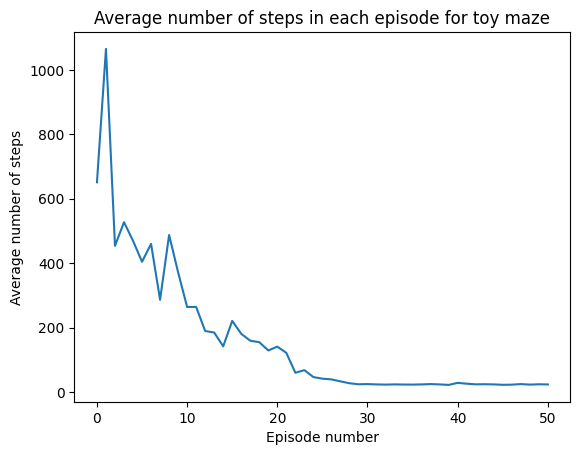

Average route over  10  runs in the last episode is:  23.2


In [157]:
plt.plot(np.average(toy_data, axis=0))
plt.title("Average number of steps in each episode for toy maze")
plt.xlabel("Episode number")
plt.ylabel("Average number of steps")
plt.show()

print("Average route over ", num, " runs in the last episode is: ", np.average(toy_data, axis=0)[-1])

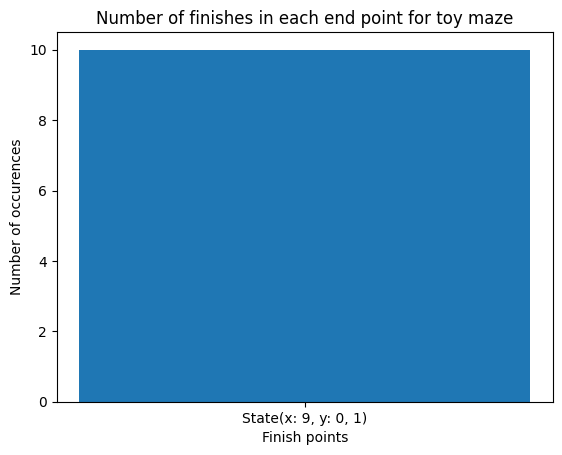

In [158]:
plt.bar(toy_finishes.keys(), toy_finishes.values())
plt.title("Number of finishes in each end point for toy maze")
plt.xlabel("Finish points")
plt.ylabel("Number of occurences")
plt.show()

C:\Users\krzys\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\krzys\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


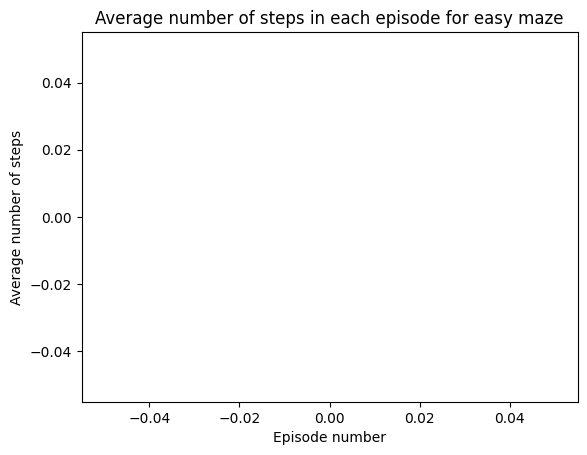

IndexError: invalid index to scalar variable.

In [159]:
plt.plot(np.average(easy_data, axis=0))
plt.title("Average number of steps in each episode for easy maze")
plt.xlabel("Episode number")
plt.ylabel("Average number of steps")
plt.show()

print("Average route over ", num, " runs in the last episode is: ", np.average(easy_data, axis=0)[-1])

### Running the Learning algorithm for 5 different epsilons


In [ ]:
epsilons = [0, 0.1, 0.2, 0.5, 0.8]
# list of lists for each epsilon value 
easy_data_values = []
toy_data_values = []

for e in epsilons:
    # Run everything num times
    num = 10

    # Load the maze
    file = "../data/easy_maze.txt"
    maze_easy = Maze(file)

    # Set the reward at the bottom right to 10
    maze_easy.set_reward(maze_easy.get_state(24, 14), 10)
    easy_data = []
    for i in range(num):
        num_list, finish_state = learning_algorithm(maze_easy, max_steps=100000, number_of_episodes=100, end_state=maze_easy.get_state(24, 14), start_epsilon=e, end_epsilon=e)
        easy_data.append(num_list)
        
    easy_data_values.append(easy_data)

Ready reading maze file ../data/easy_maze.txt
Made EGreedy


TypeError: argument of type 'State' is not iterable

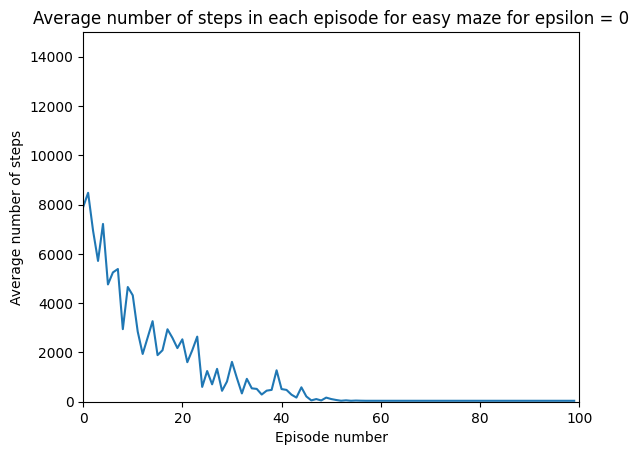

Average route over  10  runs in the last episode is:  38.0


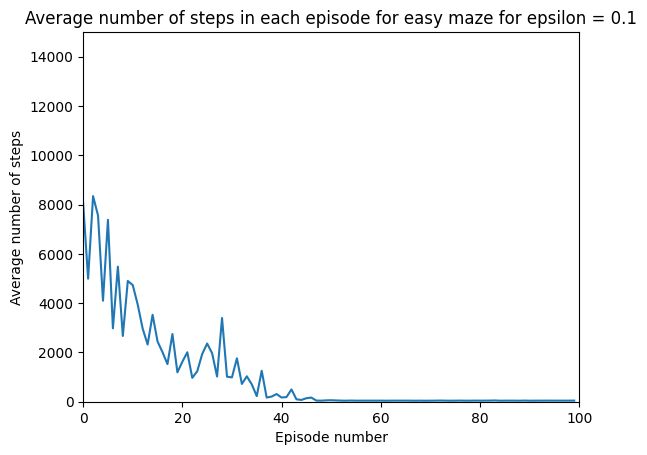

Average route over  10  runs in the last episode is:  45.2


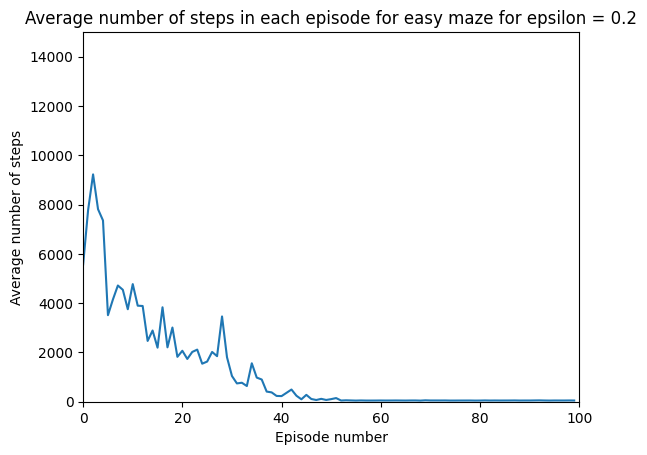

Average route over  10  runs in the last episode is:  49.0


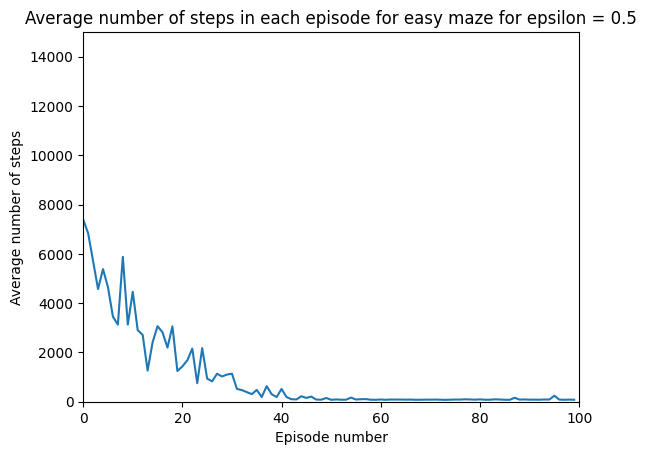

Average route over  10  runs in the last episode is:  79.0


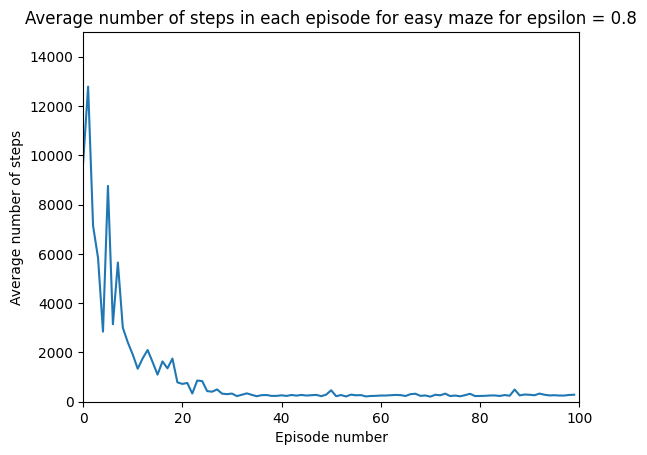

Average route over  10  runs in the last episode is:  284.4


In [ ]:
# Plot for each value of epsilon
for i in range(len(epsilons)):

    plt.plot(np.average(easy_data_values[i], axis=0))
    plt.title("Average number of steps in each episode for easy maze for epsilon = " + str(epsilons[i]))
    plt.xlabel("Episode number")
    plt.ylabel("Average number of steps")
    plt.ylim((0, 15000))
    plt.xlim((0, 100))
    plt.show()

    print("Average route over ", num, " runs in the last episode is: ", np.average(easy_data_values[i], axis=0)[-1])

# plt.show()

### Running the Learning algorithm for 5 different alphas

In [ ]:

alphas = [0, 0.2, 0.5, 0.9, 1]
# list of lists for each epsilon value 
easy_data_values_alpha = []

for a in alphas:
    # Run everything num times
    num = 10

    # Load the maze
    file = "../data/easy_maze.txt"
    maze_easy = Maze(file)

    # Set the reward at the bottom right to 10
    maze_easy.set_reward(maze_easy.get_state(24, 14), 10)
    easy_data = []
    for i in range(num):
        num_list, finish_state = learning_algorithm(maze_easy, max_steps=100000, number_of_episodes=100, end_state=maze_easy.get_state(24, 14), alfa=a)
        easy_data.append(num_list)
        
    easy_data_values_alpha.append(easy_data)

Ready reading maze file ../data/easy_maze.txt
Made EGreedy
7952
3242
16076
32370
1280
12190
3700
796
8456
2176
2576
8730
14404
10264
5064
5270
7608
16738
592
4322
11890
8028
12938
1592
2276
25322
1202
2662
306
2564
5314
1894
9650
5338
9668
10642
2418
2376
16500
9358
518
5788
5332
6716
2324
2910
2078
2888
6486
3298
3184
1458
802
6842
16326
9180
3178
6450
11892
1144
21200
6884
988
4158
2676
1838
5318
5222
17310
10212
3160
5688
16960
10818
17034
538
38572
6740
22582
11554
5214
2612
2150
1362
7582
11958
6296
2468
11170
1246
10372
812
10280
4034
5830
2278
1356
7366
25790
1570
Made EGreedy
12778
1736
28212
2910
5924
4870
19190
12668
3396
2910
2496
7318
598
16234
14630
3200
6270
13014
9638
8166
7150
31968
27530
3874
7552
3630
7814
17276
768
3244
1658
6106
38716
13606
4930
5824
6498
698
1704
4266
11686
17868
972
7732
6822
12182
2458
8976
426
8360
2034
33052
664
27628
3846
4636
16612
7510
1846
840
4746
5810
7850
18950
5980
4700
3968
13130
13194
1646
18346
6738
2576
7082
1680
10074
252
7602
1391

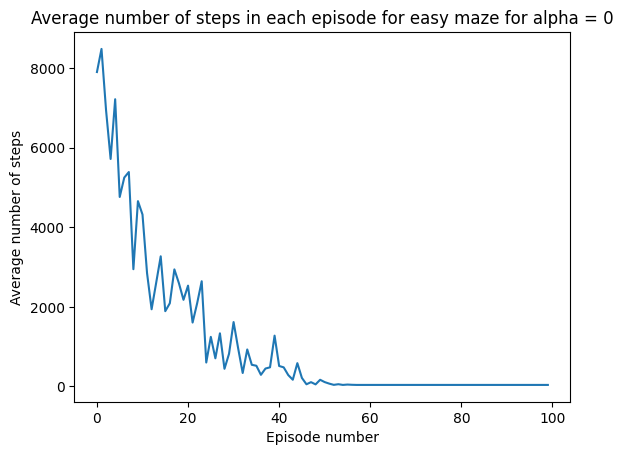

Average route over  10  runs in the last episode is:  6551.6


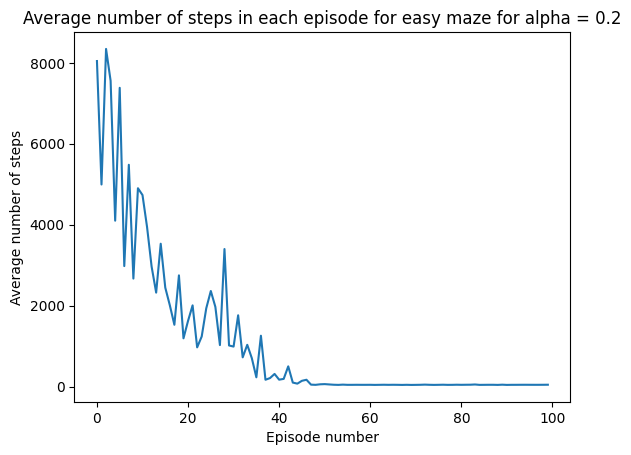

Average route over  10  runs in the last episode is:  43.4


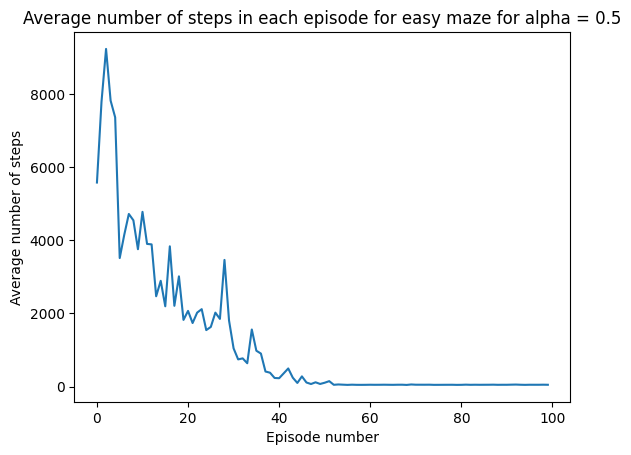

Average route over  10  runs in the last episode is:  40.2


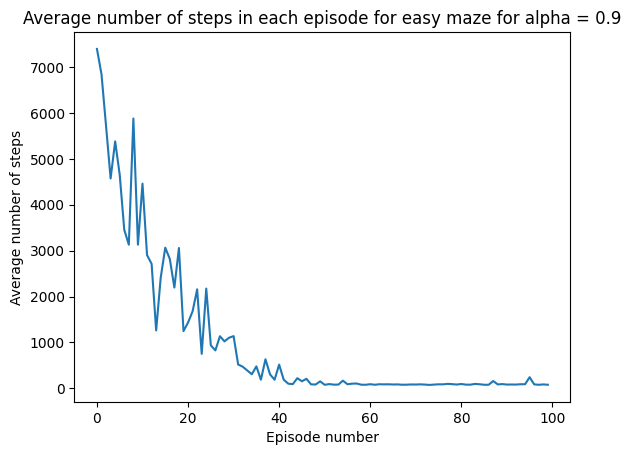

Average route over  10  runs in the last episode is:  41.4


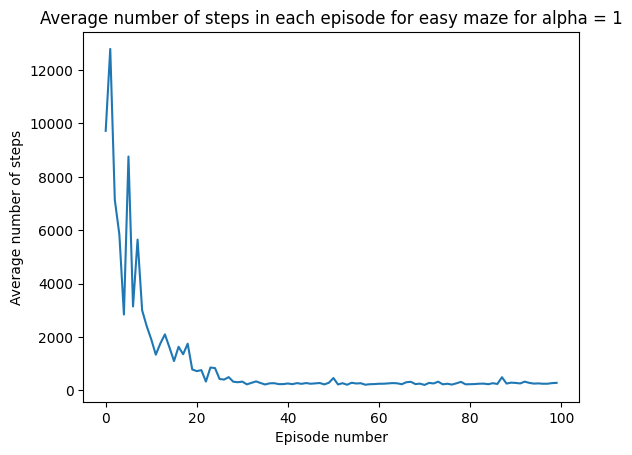

Average route over  10  runs in the last episode is:  42.0


In [ ]:
# Plot for each value of epsilon
for i in range(len(alphas)):

    plt.plot(np.average(easy_data_values[i], axis=0))
    plt.title("Average number of steps in each episode for easy maze for alpha = " + str(alphas[i]))
    plt.xlabel("Episode number")
    plt.ylabel("Average number of steps")
    # plt.ylim((0, 15000))
    # plt.xlim((0, 100))
    plt.show()

    print("Average route over ", num, " runs in the last episode is: ", np.average(easy_data_values_alpha[i], axis=0)[-1])

# plt.show()